In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib 

Using matplotlib backend: Qt5Agg


In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]
#full = train.append(test, ignore_index = True, sort = True)

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [5]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vander Cruyssen, Mr. Victor",male,1601,B96 B98,S
freq,1,577,7,4,644


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.isna().sum()[train.isna().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
test.isna().sum()[test.isna().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

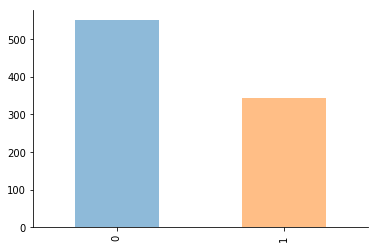

In [11]:
train['Survived'].value_counts()
train['Survived'].value_counts().plot(kind = 'bar', alpha = 0.5)
sns.despine()

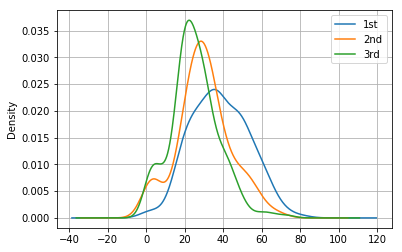

In [12]:
train.Age[train.Pclass == 1].plot(kind = "kde")
train.Age[train.Pclass == 2].plot(kind = "kde")
train.Age[train.Pclass == 3].plot(kind = "kde")
plt.grid()
plt.legend(("1st", "2nd", "3rd"))

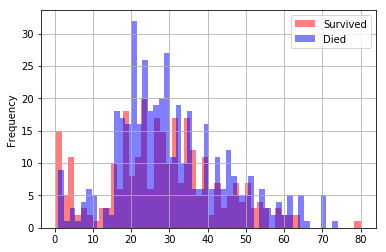

In [13]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.grid()
plt.show()

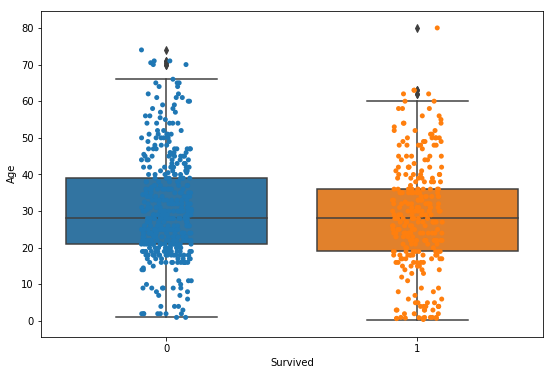

In [14]:
plt.figure(figsize = (9,6))
ax = sns.boxplot(x = "Survived", y = 'Age', data = train)
ax = sns.stripplot(x = "Survived", y = 'Age', data = train, jitter = True, edgecolor = 'gray')

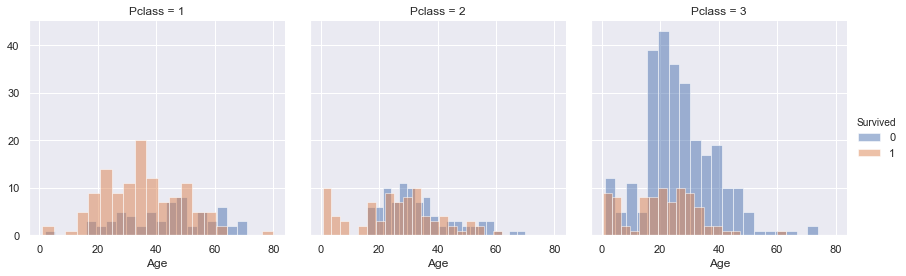

In [15]:
sns.set()
grid = sns.FacetGrid(train, col='Pclass', hue='Survived', height = 4)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

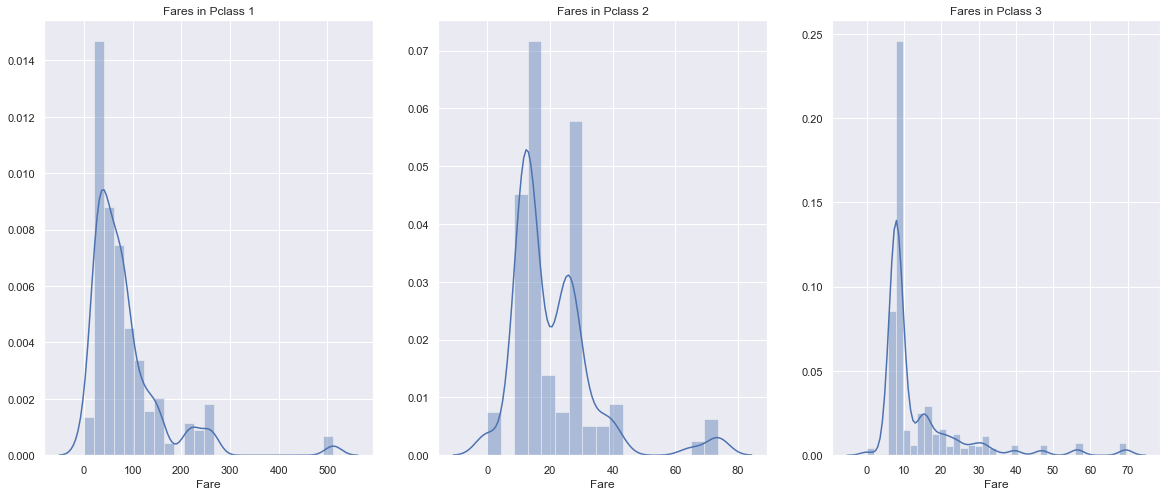

In [30]:
#g = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True, palette={1:"seagreen", 0:"gray"}, height=4)
#g = g.map(plt.scatter, "Fare", "Age",edgecolor="w", s = 50).add_legend()

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

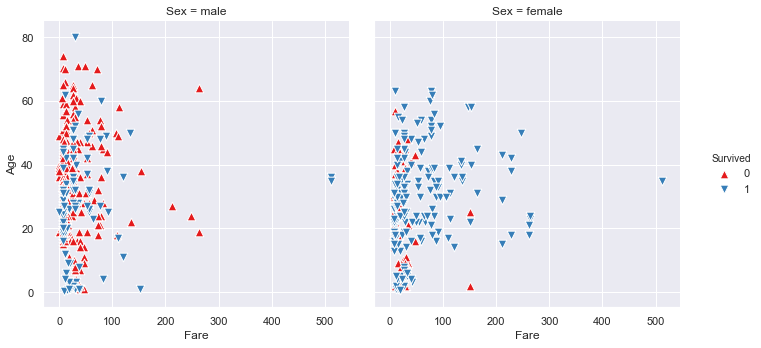

In [17]:
g = sns.FacetGrid(train, hue="Survived", col="Sex", margin_titles=True,
                  palette="Set1",hue_kws=dict(marker=["^", "v"]), height = 5)
g.map(plt.scatter, "Fare", "Age",edgecolor="w", s=75).add_legend()

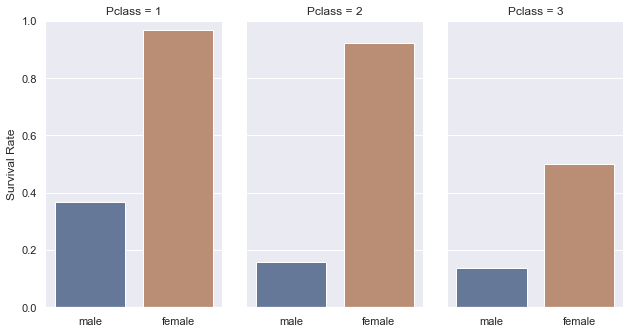

In [18]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5,
                   kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set(ylim=(0, 1))
    .despine(left=True))  

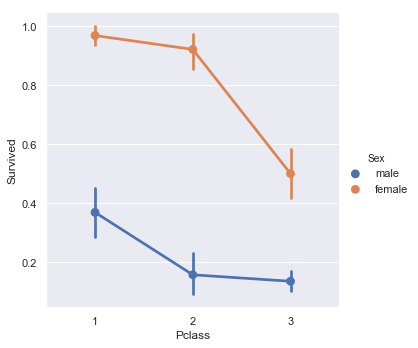

In [26]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

,Survived
Sex,
female,0.742038
male,0.188908


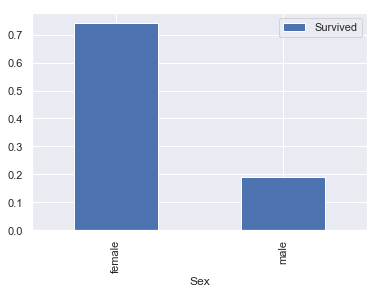

In [19]:
sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot.plot.bar()
sex_pivot

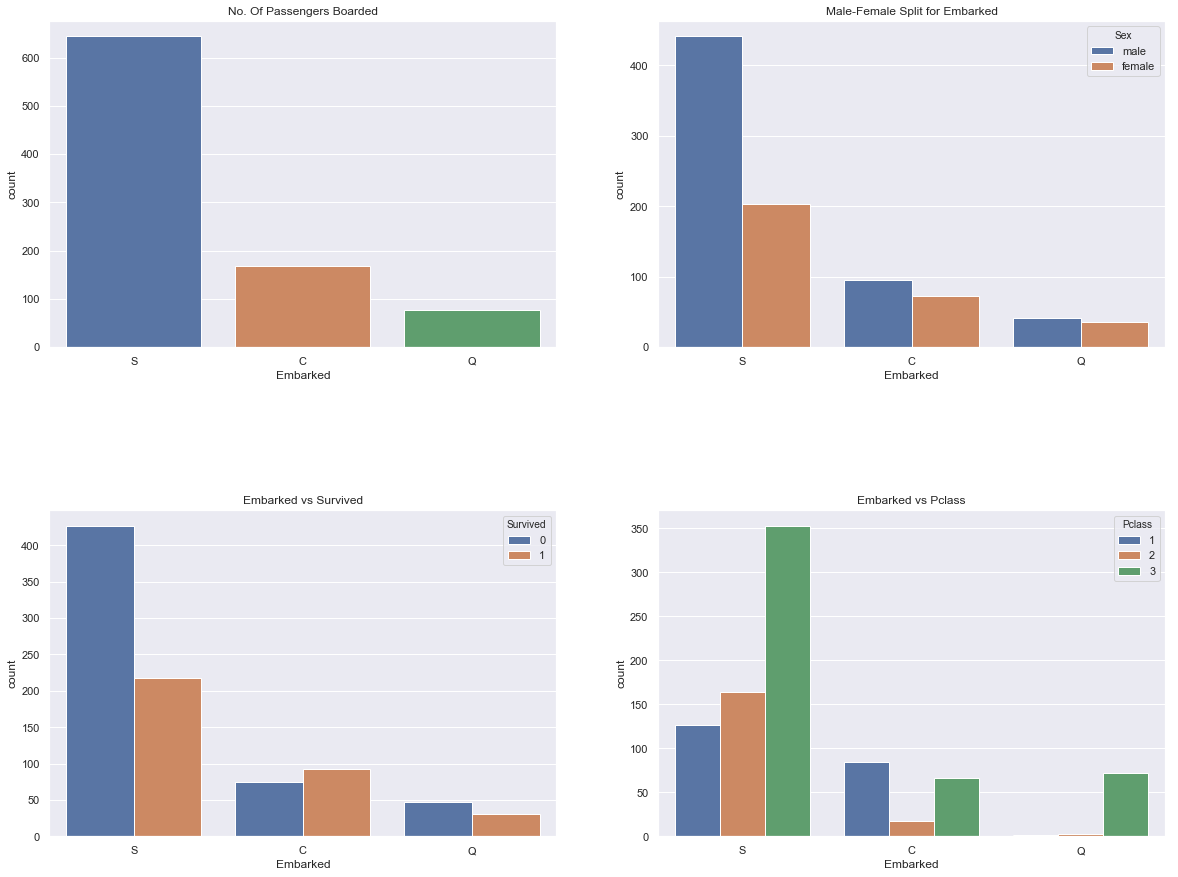

In [29]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

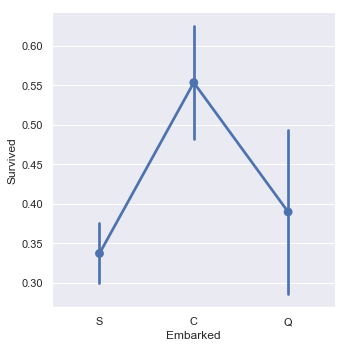

In [20]:
sns.factorplot(x = 'Embarked', y = 'Survived', data = train, color = 'b')

In [21]:
survived_summary = train.groupby('Survived')
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Text(0.5, 1.0, 'Correlation between features')

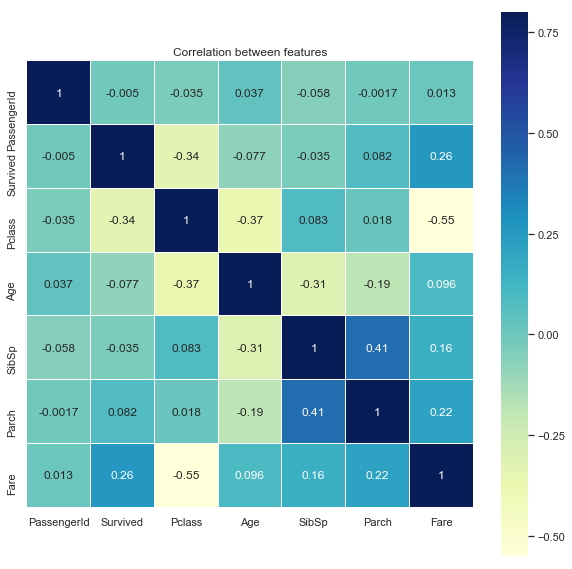

In [22]:
corr = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlation between features')

In [23]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

### Name --> Title

In [24]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\. ', expand = False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [25]:
pd.crosstab(train['Title'], train['Sex'], margins = True).style.background_gradient(cmap = 'summer_r')

Sex,female,male,All
Title,,,
Master,0,40,40
Miss,185,0,185
Mr,0,517,517
Mrs,126,0,126
Others,3,20,23
All,314,577,891


In [26]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [27]:
for dataset in combine:
    dataset.drop(["PassengerId", "Name"], axis = 1, inplace = True)

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
test.tail()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1,female,39.0,0,0,PC 17758,108.9000,C105,C,Others
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,3,male,NaN,0,0,359309,8.0500,NaN,S,Mr
417,3,male,NaN,1,1,2668,22.3583,NaN,C,Master


### Parch + SibSp --> FamilySize

In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
    dataset['Family_Single'] = dataset['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    dataset['Family_Small'] = dataset['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)
    dataset['Family_Large'] = dataset['FamilySize'].map(lambda s : 1 if 5 <= s else 0)

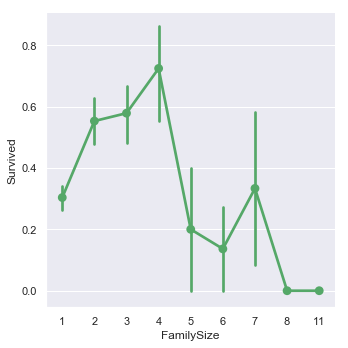

In [31]:
sns.factorplot(x = 'FamilySize', y = 'Survived', data = train, color = 'g')

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Family_Single,Family_Small,Family_Large
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,0,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0,0


In [33]:
test.tail()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Family_Single,Family_Small,Family_Large
413,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,1,0,0
414,1,female,39.0,0,0,PC 17758,108.9000,C105,C,Others,1,1,0,0
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,1,0,0
416,3,male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,1,0,0
417,3,male,NaN,1,1,2668,22.3583,NaN,C,Master,3,0,1,0


### Cabin --> Deck

In [34]:
train['Deck'] = train.Cabin.str[0]
test['Deck'] = test.Cabin.str[0]
print(train['Deck'].unique())
print(test['Deck'].unique())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
[nan 'B' 'E' 'A' 'C' 'D' 'F' 'G']


In [35]:
train['Deck'].fillna('Z', inplace = True)
test['Deck'].fillna('Z', inplace = True)
print(train['Deck'].unique())
print(test['Deck'].unique())

['Z' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['Z' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


### Fare --> FareBand

In [36]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Family_Single,Family_Small,Family_Large,Deck
152,3,male,60.5,0,0,3701,NaN,NaN,S,Mr,1,1,0,0,Z


In [37]:
test['Fare'].dropna().median()

14.4542

In [38]:
test[(test['Pclass'] == 3)]['Fare'].median()

7.8958

In [39]:
test[(test['Pclass'] == 3) & (test['Embarked'] == 'S')]['Fare'].median()

8.05

In [40]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Fare'].fillna(test[(test['Pclass'] == 3) & (test['Embarked'] == 'S')]['Fare'].dropna().median(), inplace=True)

In [41]:
train['FareBand'] = pd.qcut(train['Fare'], 4)

train['FareBand'].unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [42]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [43]:
train.drop(['FareBand'], axis = 1, inplace = True)

### LabelEncoder

In [44]:
sex_mapping = {'female': 1, 'male': 0}

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping).astype(int)

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train['Embarked_int'] = LabelEncoder().fit_transform(train['Embarked'])
test['Embarked_int'] = LabelEncoder().fit_transform(test['Embarked'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Family_Single,Family_Small,Family_Large,Deck,Embarked_int
0,0,3,0,22.0,1,0,A/5 21171,0,NaN,S,Mr,2,0,1,0,Z,2
1,1,1,1,38.0,1,0,PC 17599,3,C85,C,Mrs,2,0,1,0,C,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,1,NaN,S,Miss,1,1,0,0,Z,2
3,1,1,1,35.0,1,0,113803,3,C123,S,Mrs,2,0,1,0,C,2
4,0,3,0,35.0,0,0,373450,1,NaN,S,Mr,1,1,0,0,Z,2


In [46]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    age_df = df[['Age', 'Embarked_int', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    train = age_df.loc[(df.Age.notnull())]
    test = age_df.loc[(df.Age.isnull())]
    
    y = train.values[:, 0]
    X = train.values[:, 1::]
    
    model = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    model.fit(X,y)
    
    predictedAges = model.predict(test.values[:, 1::])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df

In [47]:
train = fill_missing_age(train)
test = fill_missing_age(test)

In [48]:
train.isna().sum()[train.isna().sum() > 0]

Cabin    687
dtype: int64

In [49]:
test.isna().sum()[test.isna().sum() > 0]

Cabin    327
dtype: int64

In [50]:
def process_age(df, cut_points, label_names):
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels = label_names)
    return df

cut_points = [0,5,12,18,35,60,100]
label_names = ["Infant","Child","Teenager","Young Adult","Adult","Senior"]

for dataset in combine:
    dataset = process_age(dataset,cut_points,label_names)

In [51]:
age_mapping = {"Infant": 0, "Child": 1, "Teenager": 2, "Young Adult": 3, "Adult": 4, "Senior": 5}

for dataset in combine:
    dataset["Age"] = dataset["Age_categories"].map(age_mapping).astype(int)

In [52]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

for column in ["Title", "Pclass", "Embarked", "Deck"]:
    train = create_dummies(train, column)
    test = create_dummies(test, column)
    
combine = [train, test]

In [53]:
display_all(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Family_Single,Family_Small,Family_Large,Deck,Embarked_int,Age_categories,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z
0,0,3,0,3,1,0,A/5 21171,0,NaN,S,Mr,2,0,1,0,Z,2,Young Adult,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,1,4,1,0,PC 17599,3,C85,C,Mrs,2,0,1,0,C,0,Adult,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,3,1,3,0,0,STON/O2. 3101282,1,NaN,S,Miss,1,1,0,0,Z,2,Young Adult,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,1,3,1,0,113803,3,C123,S,Mrs,2,0,1,0,C,2,Young Adult,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,0,3,0,0,373450,1,NaN,S,Mr,1,1,0,0,Z,2,Young Adult,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
5,0,3,0,3,0,0,330877,1,NaN,Q,Mr,1,1,0,0,Z,1,Young Adult,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
6,0,1,0,4,0,0,17463,3,E46,S,Mr,1,1,0,0,E,2,Adult,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7,0,3,0,0,3,1,349909,2,NaN,S,Master,5,0,0,1,Z,2,Infant,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
8,1,3,1,3,0,2,347742,1,NaN,S,Mrs,3,0,1,0,Z,2,Young Adult,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
9,1,2,1,2,1,0,237736,2,NaN,C,Mrs,2,0,1,0,Z,0,Teenager,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [54]:
for dataset in combine:
    dataset.drop(["Pclass", "Embarked", "Age_categories", "Cabin", "Ticket", 'Embarked_int', "Deck", "FamilySize", "Title"], axis=1, inplace=True)

In [55]:
display_all(train.head())

,Survived,Sex,Age,SibSp,Parch,Fare,Family_Single,Family_Small,Family_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z
0,0,0,3,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,4,1,0,3,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,1,3,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,3,1,0,3,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,0,3,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [56]:
display_all(test.tail())

,Sex,Age,SibSp,Parch,Fare,Family_Single,Family_Small,Family_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z
413,0,3,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
414,1,4,0,0,3,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
415,0,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
416,0,3,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
417,0,1,1,1,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
Survived         891 non-null int64
Sex              891 non-null int64
Age              891 non-null int64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null int64
Family_Single    891 non-null int64
Family_Small     891 non-null int64
Family_Large     891 non-null int64
Title_Master     891 non-null uint8
Title_Miss       891 non-null uint8
Title_Mr         891 non-null uint8
Title_Mrs        891 non-null uint8
Title_Others     891 non-null uint8
Pclass_1         891 non-null uint8
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
Deck_A           891 non-null uint8
Deck_B           891 non-null uint8
Deck_C           891 non-null uint8
Deck_D           891 non-null uint8
Deck_E           891 non-null u

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
Sex              418 non-null int64
Age              418 non-null int64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null int64
Family_Single    418 non-null int64
Family_Small     418 non-null int64
Family_Large     418 non-null int64
Title_Master     418 non-null uint8
Title_Miss       418 non-null uint8
Title_Mr         418 non-null uint8
Title_Mrs        418 non-null uint8
Title_Others     418 non-null uint8
Pclass_1         418 non-null uint8
Pclass_2         418 non-null uint8
Pclass_3         418 non-null uint8
Embarked_C       418 non-null uint8
Embarked_Q       418 non-null uint8
Embarked_S       418 non-null uint8
Deck_A           418 non-null uint8
Deck_B           418 non-null uint8
Deck_C           418 non-null uint8
Deck_D           418 non-null uint8
Deck_E           418 non-null uint8
Deck_F           418 non-null u

Age guessing for missing values based on 'Sex' and 'Pclass'

### *Linear Regression*

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

predictors = list(test.columns.values)
kf = KFold(n_splits = 3, random_state = 1)
LR = LinearRegression()
outcomes = []
fold = 0
for train_index, test_index in kf.split(train[predictors], train['Survived']):
    fold += 1
    X_train, X_test = train[predictors].values[train_index], train[predictors].values[test_index]
    y_train, y_test = train['Survived'].values[train_index], train['Survived'].values[test_index]
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    predictions[predictions > .5] = 1
    predictions[predictions <= .5] = 0
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
    print("Fold {0} accuracy: {1}".format(fold, accuracy))
mean_outcome = np.mean(outcomes)
mean_outcome

Fold 1 accuracy: 0.8114478114478114
Fold 2 accuracy: 0.8181818181818182
Fold 3 accuracy: 0.835016835016835


0.8215488215488215

### *Logistic Regression*

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

lr = LogisticRegression(solver='liblinear')

all_X = train[predictors]
all_y = train['Survived']

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

scores = cross_val_score(lr, all_X, all_y, scoring = 'f1', cv = cv)
accuracy = scores.mean()
accuracy

0.777997154800838

### *Decision Tree Classifier*

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

max_depth = range(1,30)
max_feature = list(range(20,28))
criterion = ["entropy", 'gini']
cv = StratifiedKFold(n_splits=20, random_state=15, shuffle=True)

param = {'max_depth': max_depth,
         'max_features': max_feature,
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = param, verbose = False, cv=cv, n_jobs = -1)
grid.fit(all_X, all_y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [20, 21, 22, 23, 24, 25, 26, 27], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [62]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 26}
0.8327721661054994
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=26, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [63]:
dectree_grid = grid.best_estimator_
dectree_grid.score(all_X, all_y)

0.8316498316498316

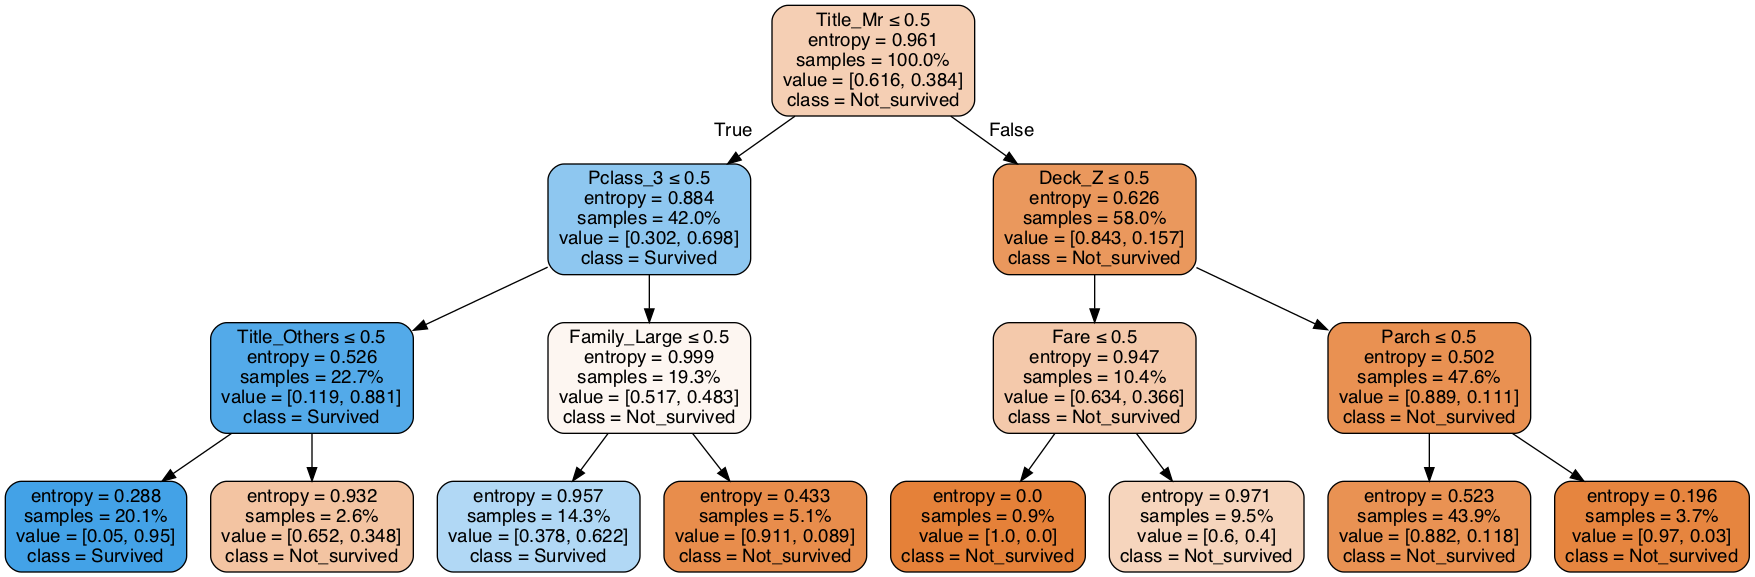

In [64]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=train[predictors].columns,  
                class_names=(["Survived" if int(i) is 1 else "Not_survived" for i in all_y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

# alternative tree
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(decision_tree=dectree_grid, out_file=None, feature_names=train[predictors].columns, )
#graph = graphviz.Source(dot_data)
#graph

Image(graph.create_png())

### *Random Forest Classifier*

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, train_size = 0.7, random_state = 0)
model.fit(train_X, train_y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_X.shape[1]):
    print('%2d) %-*s %f' %(f+1, 30, train[predictors].columns[f], importances[indices[f]]))

pred_y = model.predict(test_X)

 1) Sex                            0.156582
 2) Age                            0.132499
 3) SibSp                          0.099813
 4) Parch                          0.081491
 5) Fare                           0.053898
 6) Family_Single                  0.050810
 7) Family_Small                   0.048569
 8) Family_Large                   0.043016
 9) Title_Master                   0.040604
10) Title_Miss                     0.034686
11) Title_Mr                       0.030242
12) Title_Mrs                      0.027419
13) Title_Others                   0.026770
14) Pclass_1                       0.023142
15) Pclass_2                       0.020915
16) Pclass_3                       0.020803
17) Embarked_C                     0.018545
18) Embarked_Q                     0.015000
19) Embarked_S                     0.014283
20) Deck_A                         0.014099
21) Deck_B                         0.011589
22) Deck_C                         0.009374
23) Deck_D                      

In [66]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred_y)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8114285714285715

n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

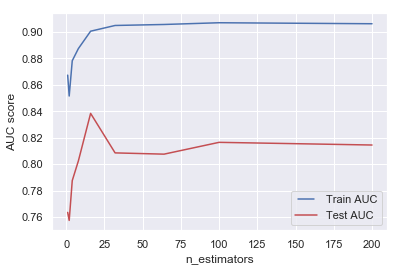

In [67]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(train_X, train_y)
   train_pred = rf.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   test_pred = rf.predict(test_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.

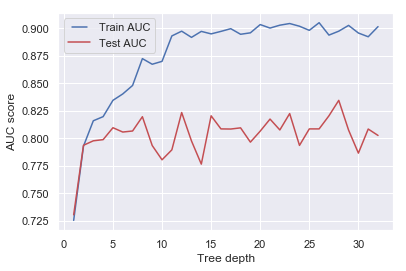

In [68]:
max_depths = np.linspace(1, 32, 32, endpoint = True)

train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(train_X, train_y)
   train_pred = rf.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   test_pred = rf.predict(test_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples.

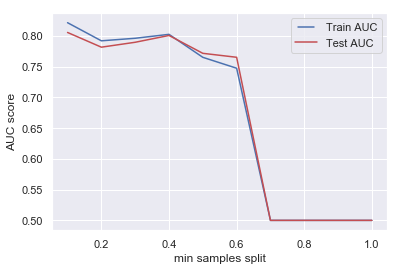

In [69]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(train_X, train_y)
   train_pred = rf.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   test_pred = rf.predict(test_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

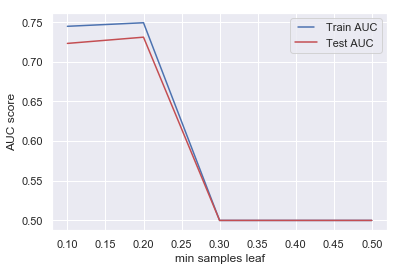

In [70]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(train_X, train_y)
   train_pred = rf.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   test_pred = rf.predict(test_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

max_features represents the number of features to consider when looking for the best split.

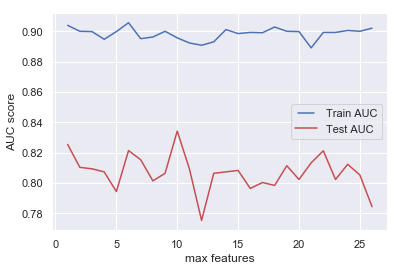

In [71]:
max_features = list(range(1,train_X.shape[1]))

train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(train_X, train_y)
   train_pred = rf.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   test_pred = rf.predict(test_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [72]:
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
kf = KFold(n_splits=5, random_state=1)

predictions = cross_val_predict(rf, train[predictors], train["Survived"], cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, train[predictors], train["Survived"], scoring='f1', cv=kf)
scores.mean()

0.7508858502778247

### *KNeighbors Classifier*

In [73]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size = 0.7)
model.fit(train_X, train_y)

pred_y = model.predict(test_X)

In [74]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred_y)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7640625

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 2)

accuracies = cross_val_score(knn, all_X, all_y, cv=cv, scoring = 'accuracy')
print ("Cross-Validation accuracy scores: {}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores: [0.79820628 0.83408072 0.78923767 0.80717489 0.80717489 0.83408072
 0.79820628 0.84304933 0.81165919 0.8161435 ]
Mean Cross-Validation accuracy score: 0.814


n_neighbors represents the number of neighbors to use for kneighbors queries.

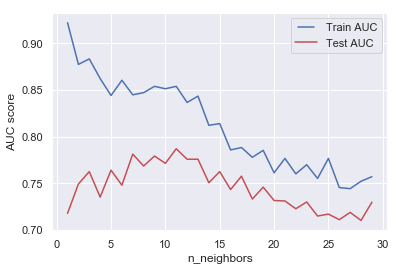

In [76]:
neighbors = list(range(1,30))

train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   test_pred = model.predict(test_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

This is the power parameter for the Minkowski metric. When p=1, this is equivalent to using manhattan_distance(l1), and euliddean_distance(l2) for p=2. For arbitrary p, minkowski distance (l_p) is used.

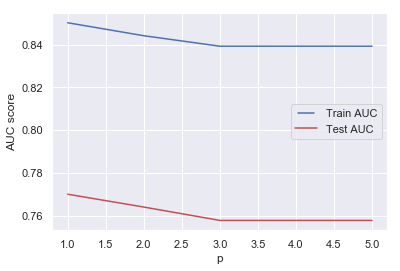

In [77]:
distances = [1, 2, 3, 4, 5]

train_results = []
test_results = []
for p in distances:
   model = KNeighborsClassifier(p=p)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   test_pred = model.predict(test_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(distances, train_results, 'b', label='Train AUC')
line2, = plt.plot(distances, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('p')
plt.show()

### *Gradient Boosting*